In [1]:
import numpy as np
import pandas as pd

In [3]:
# csv 파일 읽어오기
df = pd.read_csv('C:/Users/신수경/Desktop/수경/멋쟁이사자처럼/데이터톤/merged_data.csv', encoding='utf-8-sig')
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_time_moscow,event_month,user_key
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:00+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:03+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:07+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 03:00:07+03:00,10.0,46324001126dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 03:00:15+03:00,10.0,42968183049e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...,...
20688106,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-03-01 02:59:32+03:00,NaN,622082947fb29909b-6ef5-4662-b4ee-288e73e5dc10
20688107,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-03-01 02:59:39+03:00,NaN,45970561105d2add3-01f7-47ee-8364-27341673227f
20688108,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-03-01 02:59:45+03:00,NaN,622090043ab7d349f-db5d-4790-8ab1-31e5c894459d
20688109,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-03-01 02:59:54+03:00,NaN,61984124218af673b-7fb9-4202-a66d-5c855bc0fd2d


In [67]:
# event_month에 결측치가 있는 행 제거
df = df[~df['event_month'].isnull()]

## [product_id] 구조 확인

In [74]:
# price가 0인 행 제거
df = df[df['price'] > 0]

In [88]:
# 이상치 확인: 가격 (price)

# 음수 가격
print("음수 가격 수:", (df['price'] < 0).sum())

# 0원 가격
print("0원 가격 수:", (df['price'] == 0).sum())


음수 가격 수: 0
0원 가격 수: 0


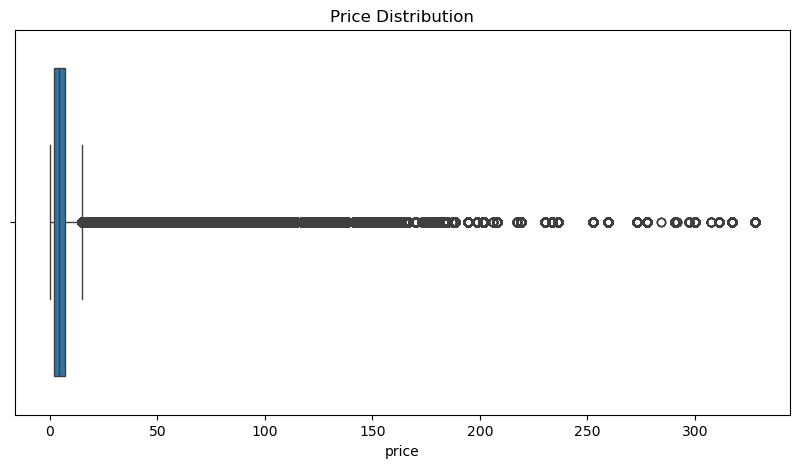

In [89]:
# 가격 분포 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title('Price Distribution')
plt.show()

In [75]:
#제품 수 확인 (중복 제거)

# 전체 고유 product_id 개수
print("고유 product_id 수:", df['product_id'].nunique())

# 상위 몇 개 출력
print("상위 product_id 예시:\n", df['product_id'].value_counts().head())

고유 product_id 수: 53897
상위 product_id 예시:
 product_id
5809910    141420
5809912     55502
5700037     50999
5802432     44958
5854897     44735
Name: count, dtype: int64


## 총 53897종류의 제품이 있고,

## 그 중 일부는 압도적으로 많은 이벤트 기록을 가짐 (예: 5809910번 제품이 14만 건).

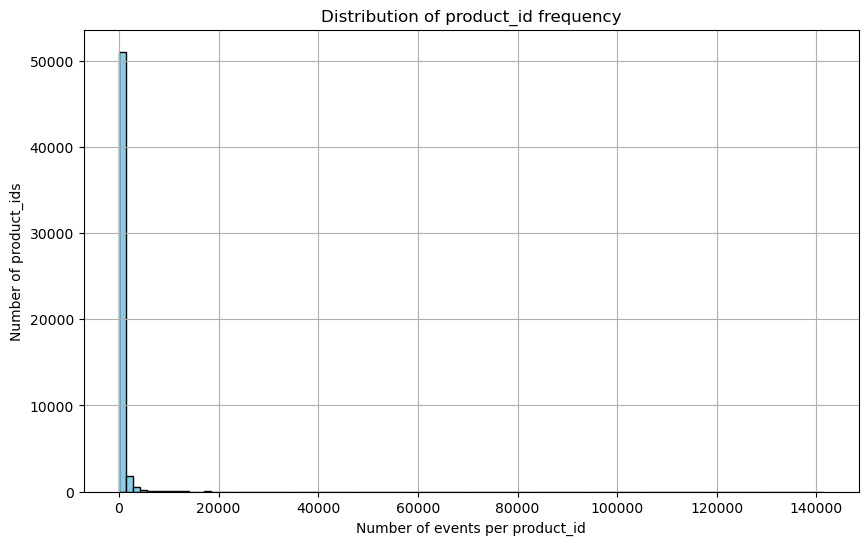

In [121]:
# 히스토그램으로 제품별 등장 횟수 분포 확인

import matplotlib.pyplot as plt

# product_id별 등장 횟수 계산
product_counts = df['product_id'].value_counts()

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(product_counts, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of product_id frequency')
plt.xlabel('Number of events per product_id')
plt.ylabel('Number of product_ids')
plt.grid(True)
plt.show()

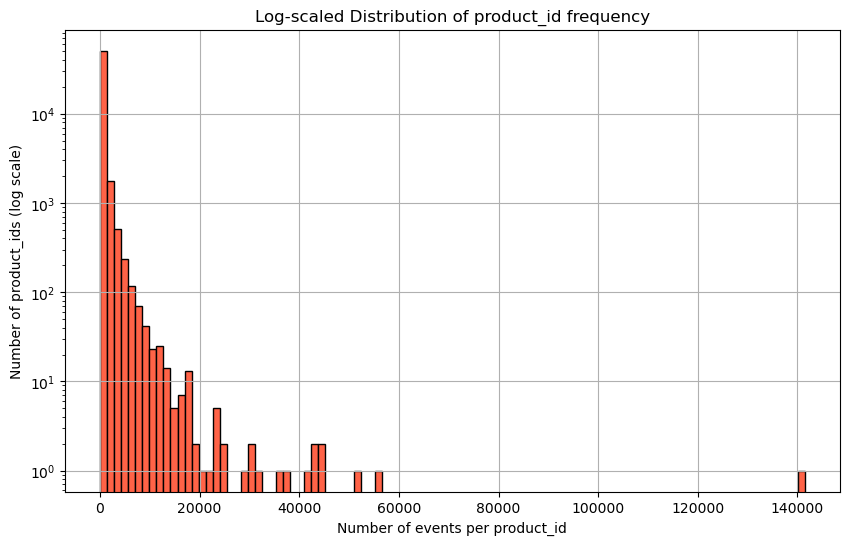

In [123]:
# 로그 스케일 분포로 보기 (상위 쏠림 확인)

plt.figure(figsize=(10, 6))
plt.hist(product_counts, bins=100, color='tomato', edgecolor='black', log=True)
plt.title('Log-scaled Distribution of product_id frequency')
plt.xlabel('Number of events per product_id')
plt.ylabel('Number of product_ids (log scale)')
plt.grid(True)
plt.show()

In [125]:
product_counts.head(10)

product_id
5809910    141420
5809912     55502
5700037     50999
5802432     44958
5854897     44735
5751422     43153
5751383     43048
5815662     41221
5849033     37535
5809911     36105
Name: count, dtype: int64

## [Product ID] 중심 EDA 계획 및 코드

### 1. 제품별 조회 수, 장바구니, 구매 수

In [92]:
# 제품별 이벤트 횟수 집계
product_event_counts = df.pivot_table(
    index='product_id', 
    columns='event_type', 
    values='user_key', 
    aggfunc='count', 
    fill_value=0
)

# 이벤트 합 및 전환율 계산
product_event_counts['total_events'] = product_event_counts.sum(axis=1)
product_event_counts['conversion_rate'] = np.where(
    product_event_counts['view'] == 0,
    np.nan,
    product_event_counts['purchase'] / product_event_counts['view']
)

# 전환율 기준 정렬
product_event_counts_sorted = product_event_counts.sort_values(by='conversion_rate', ascending=False)

In [93]:
# 제품별 이벤트 수 및 전환율 출력

# 전환율 기준 정렬된 테이블 확인
print(product_event_counts_sorted.head())  # 또는
product_event_counts_sorted.head(10)  # → Jupyter/Colab에서는 이 방식 추천

event_type  cart  purchase  remove_from_cart  view  total_events  \
product_id                                                         
5929832       10         5                 2     1            18   
5910729        6         5                 0     1            12   
5918424        4         4                 1     1            10   
5864655       65        24                47     6           142   
5899513       18         8                 5     2            33   

event_type  conversion_rate  
product_id                   
5929832                 5.0  
5910729                 5.0  
5918424                 4.0  
5864655                 4.0  
5899513                 4.0  


event_type,cart,purchase,remove_from_cart,view,total_events,conversion_rate
product_id,,,,,,
5929832,10,5,2,1,18,5.000000
5910729,6,5,0,1,12,5.000000
5918424,4,4,1,1,10,4.000000
5864655,65,24,47,6,142,4.000000
5899513,18,8,5,2,33,4.000000
5920512,11,3,12,1,27,3.000000
5930358,4,3,2,1,10,3.000000
5894911,339,105,185,37,666,2.837838
5894916,316,84,175,31,606,2.709677


In [94]:
# 전환율과 평균 가격 비교용 테이블 출력

# 구매 전환율과 평균 가격 간 관계 테이블 확인
print(conversion_vs_price.head())  # 또는
conversion_vs_price.dropna().head(10)

            conversion  avg_price
product_id                       
3752               NaN  15.710000
3762          0.126670  19.300827
3763          0.052117  15.900099
3771               NaN  15.080000
3773               NaN  12.540000


,conversion,avg_price
product_id,,
3762,0.126670,19.300827
3763,0.052117,15.900099
3774,0.109325,15.888758
3776,0.028689,15.799804
3806,0.026895,15.887349
3928,0.094982,15.990294
3929,0.023529,16.030000
3936,0.034261,13.112212
3945,0.089317,15.700577


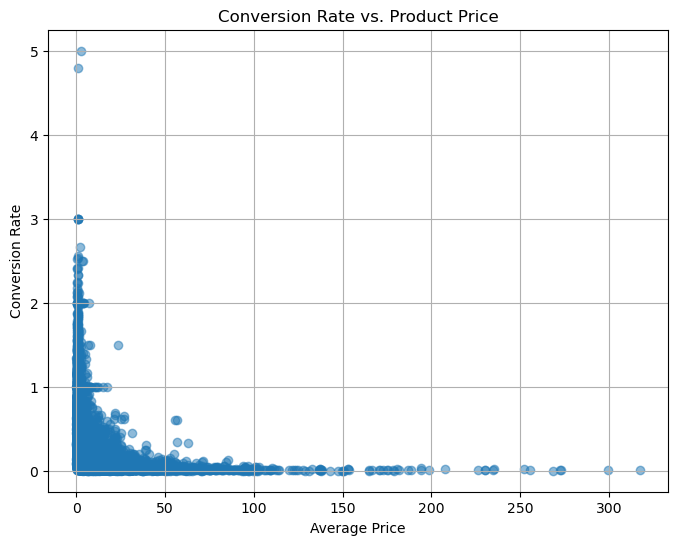

In [95]:
# 시각화
import matplotlib.pyplot as plt

# 전환율 vs. 평균 가격 산점도
plt.figure(figsize=(8,6))
plt.scatter(conversion_vs_price['avg_price'], conversion_vs_price['conversion'], alpha=0.5)
plt.xlabel('Average Price')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Product Price')
plt.grid(True)
plt.show()

In [137]:
# product_id별 구매 전환율
views = df[df['event_type'] == 'view'].groupby('product_id')['user_session'].nunique()
purchases = df[df['event_type'] == 'purchase'].groupby('product_id')['user_session'].nunique()
product_conversion = (purchases / views).dropna().sort_values(ascending=False)

# price와 전환율의 관계 (예시)
price_mean = df.groupby('product_id')['price'].mean()
conversion_vs_price = pd.DataFrame({'conversion': product_conversion, 'avg_price': price_mean})

### 2. 전환율 높은 제품 Top 10

In [153]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'  # 맥용
# plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스용 (설치 필요 시 `apt install fonts-nanum`)

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

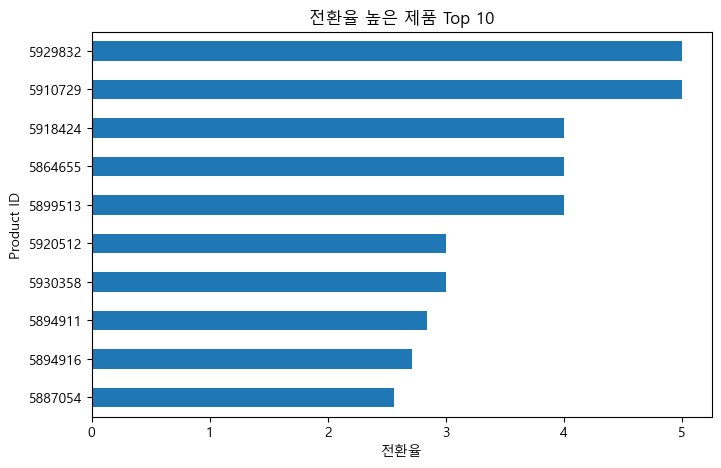

In [155]:
top10 = product_event_counts_sorted.head(10)
top10['conversion_rate'].plot(kind='barh', figsize=(8,5), title='전환율 높은 제품 Top 10')
plt.xlabel('전환율')
plt.ylabel('Product ID')
plt.gca().invert_yaxis()
plt.show()

### 3. 가격과 전환율의 관계

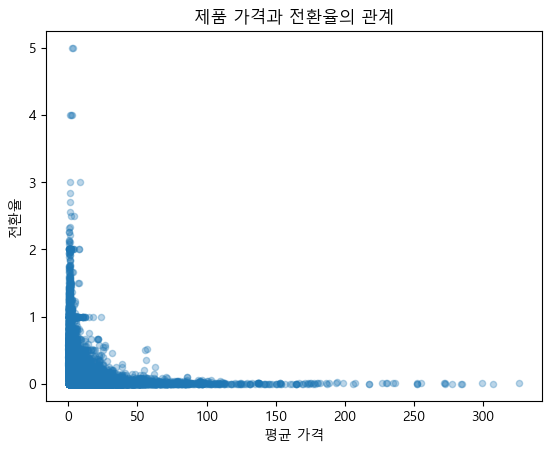

In [157]:
# 제품별 평균 가격
price_by_product = df.groupby('product_id')['price'].mean()

# price + conversion 합치기
conversion_price = pd.concat([product_event_counts['conversion_rate'], price_by_product], axis=1)
conversion_price.columns = ['conversion_rate', 'avg_price']

# 시각화
conversion_price.plot(kind='scatter', x='avg_price', y='conversion_rate', alpha=0.3,
                      title='제품 가격과 전환율의 관계')
plt.xlabel('평균 가격')
plt.ylabel('전환율')
plt.show()

### 4. 제품별 브랜드 분포

In [160]:
# 제품별 가장 많이 연결된 브랜드 확인
product_brand = df.groupby('product_id')['brand'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# 상위 제품과 브랜드 함께 보기
top10_brands = product_brand.loc[top10.index]
pd.DataFrame({'brand': top10_brands, 'conversion_rate': top10['conversion_rate']})

,brand,conversion_rate
product_id,,
5929832,unknown,5.000000
5910729,dewal,5.000000
5918424,unknown,4.000000
5864655,unknown,4.000000
5899513,opi,4.000000
5920512,bielenda,3.000000
5930358,solomeya,3.000000
5894911,jessnail,2.837838
5894916,jessnail,2.709677


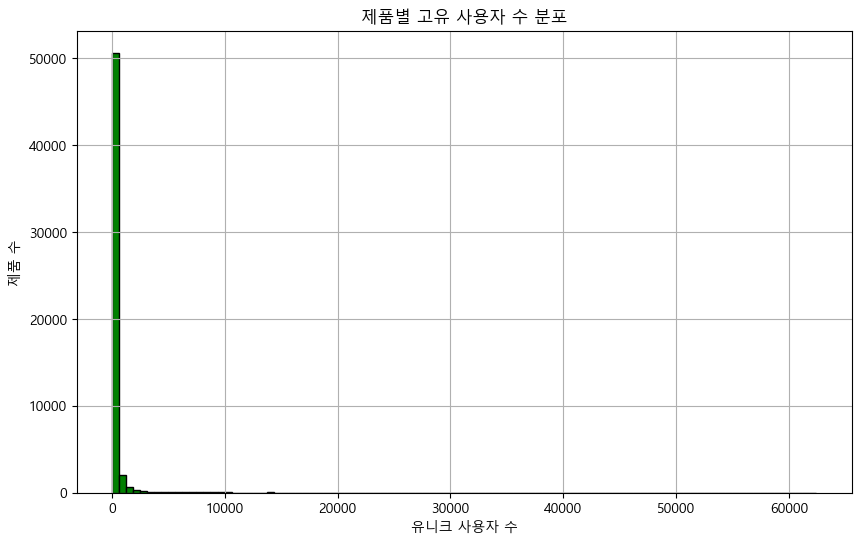

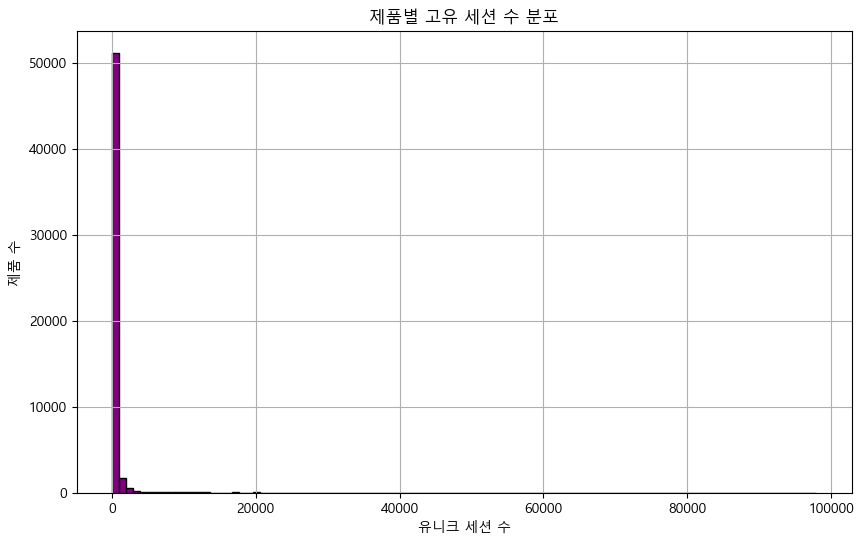

In [162]:
# 고객 유입/구매 집중도 (유니크 user_id 및 session 수)

# 제품별 고유 사용자 수
unique_users_per_product = df.groupby('product_id')['user_id'].nunique()
unique_sessions_per_product = df.groupby('product_id')['user_session'].nunique()

# 시각화: 사용자 수 분포
plt.figure(figsize=(10,6))
plt.hist(unique_users_per_product, bins=100, color='green', edgecolor='black')
plt.title('제품별 고유 사용자 수 분포')
plt.xlabel('유니크 사용자 수')
plt.ylabel('제품 수')
plt.grid(True)
plt.show()

# 시각화: 세션 수 분포
plt.figure(figsize=(10,6))
plt.hist(unique_sessions_per_product, bins=100, color='purple', edgecolor='black')
plt.title('제품별 고유 세션 수 분포')
plt.xlabel('유니크 세션 수')
plt.ylabel('제품 수')
plt.grid(True)
plt.show()

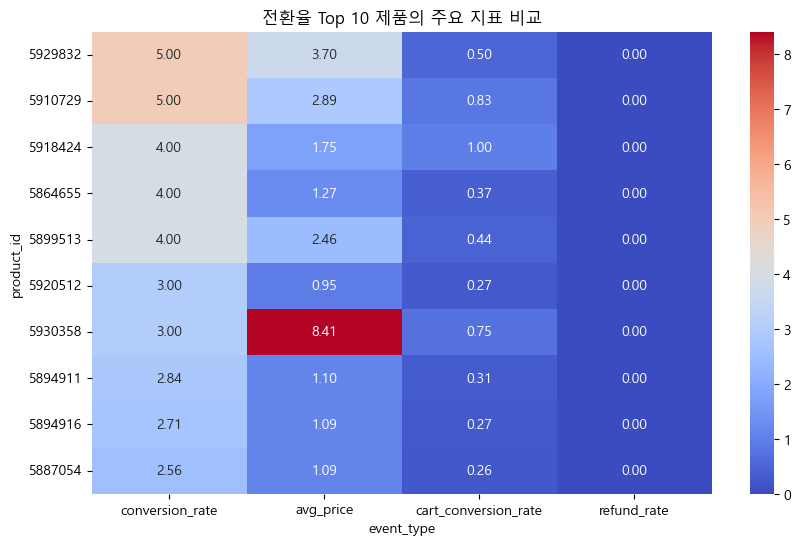

In [163]:
# 상위 제품 집중 분석 (전환율 Top 10 히트맵)

import seaborn as sns

# 구매 전환율 높은 상위 10개 제품
top10 = product_event_counts_sorted.head(10).copy()

# 전환율 외 파생 변수들 계산
top10['avg_price'] = df.groupby('product_id')['price'].mean().reindex(top10.index)
top10['cart_conversion_rate'] = top10['purchase'] / (top10['cart'] + 1e-5)
top10['refund_rate'] = df[df['price'] < 0].groupby('product_id')['user_id'].count().reindex(top10.index).fillna(0)
top10['refund_rate'] = top10['refund_rate'] / top10['purchase']

# 주요 변수 시각화 (히트맵)
plt.figure(figsize=(10, 6))
sns.heatmap(top10[['conversion_rate', 'avg_price', 'cart_conversion_rate', 'refund_rate']],
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title('전환율 Top 10 제품의 주요 지표 비교')
plt.show()

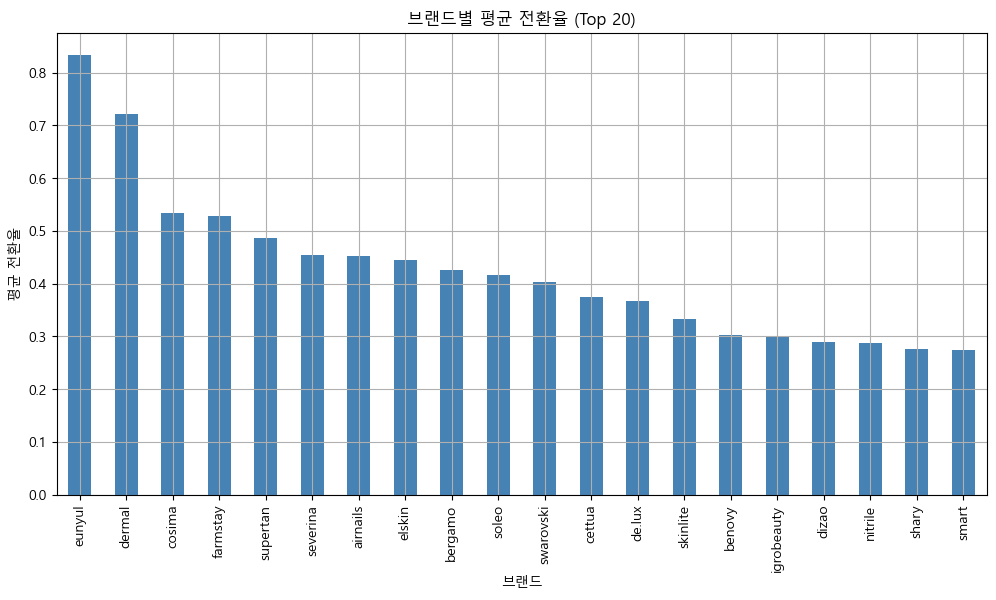

In [167]:
# 카테고리/브랜드별 전환율 (product_id 기반 groupby)

# 브랜드별 전환율 계산
df_merged = df.merge(product_event_counts[['conversion_rate']], how='left', left_on='product_id', right_index=True)

# 브랜드 전환율 평균
brand_conversion = df_merged.groupby('brand')['conversion_rate'].mean().dropna().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
brand_conversion.head(20).plot(kind='bar', color='steelblue')
plt.title('브랜드별 평균 전환율 (Top 20)')
plt.xlabel('브랜드')
plt.ylabel('평균 전환율')
plt.grid(True)
plt.show()